# MDP Lesson 2:  additional methods

**Import the modules**

In [1]:
import marmote.core as mc 
import marmote.markovchain as mmc
import marmote.mdp as md

also import numpy

In [2]:
import numpy as np

## Build the MDP

### Description of the model

We use a model with three states *s1, s2, s3* and three actions *a0, a1, a2*. Transitions probabilities and rewards are described by the picture below.

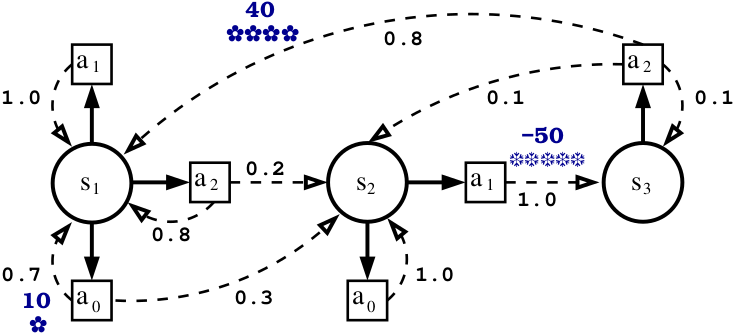

**Creating States**

In [3]:
actionSpace = mc.MarmoteInterval(0,2) 
stateSpace = mc.MarmoteInterval(0,2) 

**Some modelling choices**

As it could be noticed, the number of actions is not the same in each state. In state *s1* one could trigger any of the actions *a0*, *a1*, and *a2* while in state *s3* only action *a2* can be triggered.  
To make programming easier, we have chosen to have an identical action space in each state. This means that we can activate all actions *a0*, *a1*, *a2* in all state. To do this, we add missing actions which will have no effect and which will receive a high cost.  
Hence in state *s3* we add action *a0* with a transition to *s3* with probability *1*.  
Hence in state *s3* we add action *a0* with a transition to *s3* with probability *1*.  
Hence in state *s2* we add action *a2* with a transition to *s2* with probability *1*.  

Here we enter the transition matrices (we do not entry the null values) and add each matricx to a list. The matrices obey to the modeling choice presented above and then have the same dimension.

**Creating Transitions Matrices**

In [4]:
trans=list()
        
# matrix for the a_0 action    
P0 = mc.SparseMatrix(3)
P0.setEntry(0,0,0.7) 
P0.setEntry(0,1,0.3) 
P0.setEntry(1,1,1.0) 
P0.setEntry(2,2,1.0) 
trans.append(P0) 

# matrix for the a_1 action
P1 = mc.SparseMatrix(3) 
P1.setEntry(0,0,1.0)  
P1.setEntry(1,2,1.0) 
P1.setEntry(2,2,1.0) 
trans.append(P1) 

# matrix for the a_2 action    
P2 = mc.SparseMatrix(3) 
P2.setEntry(0,0,0.8) 
P2.setEntry(0,1,0.2)
P2.setEntry(1,1,1.0) 
P2.setEntry(2,0,0.8) 
P2.setEntry(2,1,0.1) 
P2.setEntry(2,2,0.1) 
trans.append(P2) 


**Creation of several rewards matrices**

Since the reward values depend on the transition with a cost per transition, then we  use a second way to build the MDP. 
We use a second constructor which uses two lists of matrices. One for the transition matrices as before and another for the rewards per transition. For the later list, the matrix at the *k*-th entry defines the gains associated with the action with index *k*. In this matrix, the entry with coordinate (i,j) defines the reward of the transition from i to j.

We also define the penalty given to unavailable actions. Here a small negative value (-10^5) is used.

In [5]:
penalty = -100000 

R1 =  mc.SparseMatrix(3)
R2 =  mc.SparseMatrix(3)
R3 =  mc.SparseMatrix(3)

# fill in non null entries in sparse matrix    
R1.setEntry(0,0,10)
R1.setEntry(2,2,penalty)

R2.setEntry(1,2,-50)
R2.setEntry(2,2,penalty)
    
R3.setEntry(1,1,penalty)
R3.setEntry(2,0,40)

#Adding reward to list
rews=list()
rews.append(R1)
rews.append(R2)
rews.append(R3)

Let us check the matrices

In [6]:
print("Checking")
print("R1",str(R1))
print("R2",str(R2))
print("R3",str(R3))

Checking
R1 [[1.000000e+01, 0.000000e+00, 0.000000e+00],
 [0.000000e+00, 0.000000e+00, 0.000000e+00],
 [0.000000e+00, 0.000000e+00, -1.000000e+05]]

R2 [[0.000000e+00, 0.000000e+00, 0.000000e+00],
 [0.000000e+00, 0.000000e+00, -5.000000e+01],
 [0.000000e+00, 0.000000e+00, -1.000000e+05]]

R3 [[0.000000e+00, 0.000000e+00, 0.000000e+00],
 [0.000000e+00, -1.000000e+05, 0.000000e+00],
 [4.000000e+01, 0.000000e+00, 0.000000e+00]]



**Parameters definition**

In [7]:
beta = 0.95
criterion="max"

### Build the MDP

In [8]:
second_mdp = md.DiscountedMDP(criterion, stateSpace, actionSpace, trans, rews, beta) 

## Solve the MDP

Giving a value to the parameters for the solving algorithms

In [9]:
#create and initialize epsilon.
epsilon = 0.00001
#maximum number of iterations allowed.
maxIter = 150

In [10]:
optimum2 = second_mdp.ValueIteration(epsilon, maxIter)
print(optimum2)

#############################################
Solution of MDP problem
Size of the state space: 3
#############################################
Solution model: Feedback Stationary Policy
- column 1: index of the state
- column 2: Value function 
- column 3: Optimal action 

  0           21.8983   0
  1           1.17884   1
  2           53.8725   2
#############################################




## Additional features (Markov Chain and Q-Value)

### Creation of the Markov chain associated with a policy

The transition matrix associated with a policy can be retrieved using the `getChain` method, which returns a `SparseMatrix` constructed with respect to the policy given as a parameter. 

In [11]:
Mat=second_mdp.GetChain(optimum2)
Mat.set_type(mc.DISCRETE)
print(Mat)

[[7.000000e-01, 3.000000e-01, 0.000000e+00],
 [0.000000e+00, 0.000000e+00, 1.000000e+00],
 [8.000000e-01, 1.000000e-01, 1.000000e-01]]



No we create the Markov Chain as detailled in Lesson 1. We first create the initial distribution, then the chain.

In [12]:
initial_prob = np.array( [0.333, 0.333, 0.334] )
states=np.array([0,1,2])
initial = mc.DiscreteDistribution(states, initial_prob)

In [13]:
chain = mmc.MarkovChain( Mat )
chain.set_init_distribution(initial)
chain.set_model_name( "Chain issued from the MDP")

Print the chain

In [14]:
print(chain)

discrete sparse
3
         0          0 7.000000e-01
         0          1 3.000000e-01
         1          2 1.000000e+00
         2          0 8.000000e-01
         2          1 1.000000e-01
         2          2 1.000000e-01
stop
discrete values { 0 1 2 } probas {    0.333    0.333    0.334 } 



### Creation of the Q Value associated with a policy (for R.L. purpose) 

It also possible to create a `FeedbackQvalueMDP` in a `DiscountedMDP`. A `FeedbackQvalueMDP` is an object that is created form the value of a policy (in our case a `FeedbackSolutionMDP`). It stores a *Q-value*  for any couple *(s,a)* with *s* the state and *a* the action. From that, it is then possible to randomly draw actions according to the *EpsilonGreedy* or *Softmax* rules.

Create the `FeedbackQvalueMDP` object

In [15]:
F=second_mdp.GetQValue(optimum2)

Then we print it

In [16]:
print(F)

#############################################
# - column 1: index of the state
# - column 2: index of the action
# - column 3: Value
#
0 0 21.89831521
0 1 20.80335271
0 2 16.86666105
1 0 1.119894386
1 1 1.178885397
1 2 -99998.88011
2 0 -99948.82111
2 1 -99948.82111
2 2 53.87256015
#############################################



For drawing action we should reset the random generator

In [17]:
F.ResetSeed()

We draw an action with *EpsilonGreedy* principle in state 0 with epsilon=0.1 for a maximisation criteria

In [18]:
action=F.EpsilonGreedyMax(0,0.1)
print(action)

0


We draw an action with *SoftMax* principle in state 2

In [19]:
action=F.SoftMax(2)
print(action)

2
